In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset with low_memory set to False to avoid DtypeWarning
df = pd.read_csv("/Users/khushibalar/Downloads/Cleaned_Social_Media_Advertising.csv", low_memory=False)


In [68]:
# Clean the column names by stripping spaces
df.columns = df.columns.str.strip()

# Print column names to verify
print(df.columns)


Index(['Campaign_ID', 'Target_Audience', 'Audience_Segment', 'Campaign_Goal',
       'Duration', 'Normalized_Duration', 'Duration.1', 'Channel_Used',
       'Conversion_Rate', 'Acquisition_Cost', 'Normalized_Acquisition_Cost',
       'ROI', 'Location', 'Language', 'Clicks', 'Impressions',
       'Engagement_Score', 'Customer_Segment', 'Date', 'Company',
       'Cost per Click (CPC)', 'Impressions per Day', 'Engagement Rate', 'day',
       'month', 'year', 'cost per impression', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32'],
      dtype='object')


In [70]:
# Load 'Impressions per Day' as a string to inspect its content
df['Impressions per Day'] = df['Impressions per Day'].astype(str)

# Check unique values in 'Impressions per Day' to identify issues
print(df['Impressions per Day'].unique())

# If the column should be numeric, convert it to numeric
df['Impressions per Day'] = pd.to_numeric(df['Impressions per Day'], errors='coerce')

# Drop unnecessary 'Unnamed' columns
df = df.drop(columns=['Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32'])


['200' '129.13' '200.07' ... '1,999.92' '1,999.95' '1,291.25']


In [72]:
# Check for missing values and data types
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Campaign_ID                  300000 non-null  int64  
 1   Target_Audience              300000 non-null  object 
 2   Audience_Segment             300000 non-null  object 
 3   Campaign_Goal                300000 non-null  object 
 4   Duration                     300000 non-null  int64  
 5   Normalized_Duration          300000 non-null  float64
 6   Duration.1                   300000 non-null  object 
 7   Channel_Used                 300000 non-null  object 
 8   Conversion_Rate              300000 non-null  float64
 9   Acquisition_Cost             300000 non-null  float64
 10  Normalized_Acquisition_Cost  300000 non-null  float64
 11  ROI                          300000 non-null  float64
 12  Location                     300000 non-null  object 
 13 

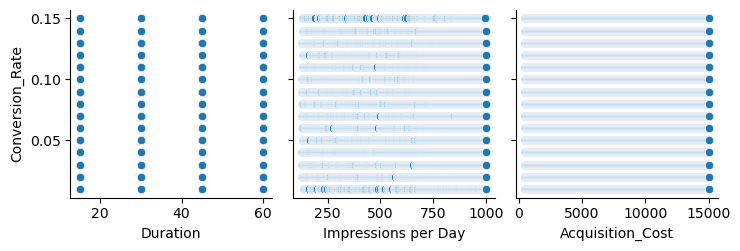

In [74]:
# Visualize relationships between key features and the target
sns.pairplot(df, x_vars=['Duration', 'Impressions per Day', 'Acquisition_Cost'], y_vars='Conversion_Rate')
plt.show()


In [80]:
# Fill missing values in 'Impressions per Day' by calculating the mean
df['Impressions per Day'] = df['Impressions per Day'].fillna(df['Impressions per Day'].mean())

# Forward-fill other missing values across the DataFrame
df.ffill(inplace=True)



In [82]:
# Summary statistics for key columns
print(df[['Conversion_Rate', 'Impressions per Day', 'Acquisition_Cost', 'Cost per Click (CPC)', 'ROI']].describe())


       Conversion_Rate  Impressions per Day  Acquisition_Cost  \
count    300000.000000        300000.000000     300000.000000   
mean          0.080009           679.641227       7753.750796   
std           0.040563           103.208469       4301.035148   
min           0.010000           129.130000        500.000000   
25%           0.050000           679.641227       4121.915000   
50%           0.080000           679.641227       7755.900000   
75%           0.110000           679.641227      11385.075000   
max           0.150000           999.980000      15000.000000   

       Cost per Click (CPC)            ROI  
count         300000.000000  300000.000000  
mean               0.455768       3.177691  
std                0.129102       2.461200  
min                0.239808       0.000000  
25%                0.379976       0.930000  
50%                0.387492       2.670000  
75%                0.572059       5.330000  
max                1.706485       8.000000  


In [84]:
df['Cost per Conversion'] = df['Acquisition_Cost'] / df['Conversion_Rate']


In [86]:
df['CTR'] = df['Clicks'] / df['Impressions'] * 100


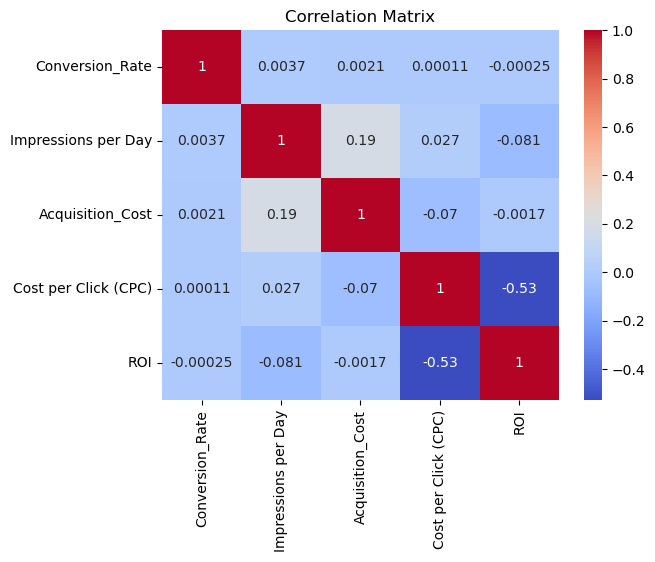

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
corr = df[['Conversion_Rate', 'Impressions per Day', 'Acquisition_Cost', 'Cost per Click (CPC)', 'ROI']].corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


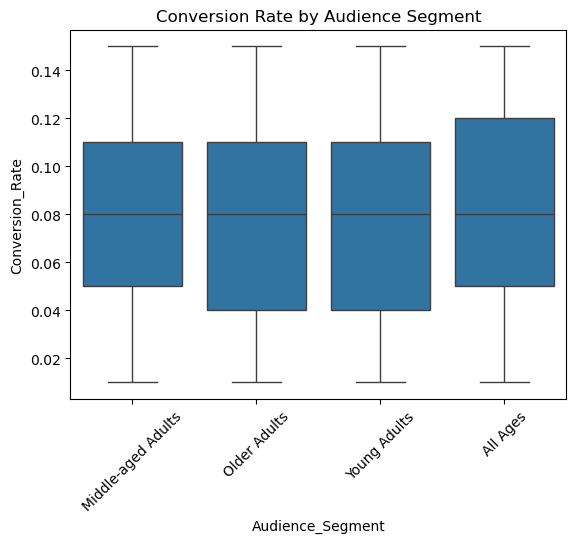

In [90]:
# Boxplot for Conversion Rate by Audience Segment
sns.boxplot(x='Audience_Segment', y='Conversion_Rate', data=df)
plt.xticks(rotation=45)
plt.title('Conversion Rate by Audience Segment')
plt.show()


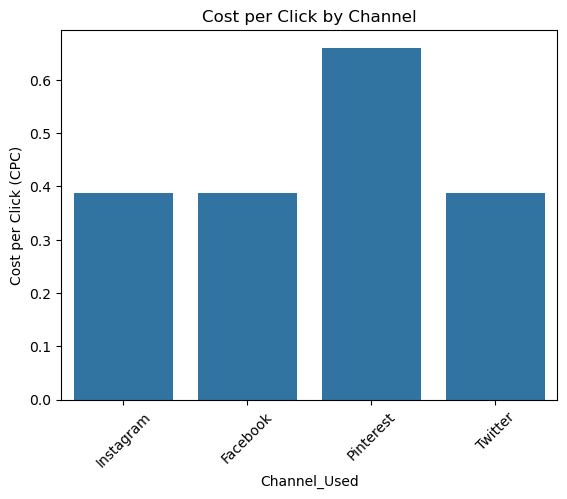

In [92]:
# Barplot for CPC by Channel Used
sns.barplot(x='Channel_Used', y='Cost per Click (CPC)', data=df)
plt.xticks(rotation=45)
plt.title('Cost per Click by Channel')
plt.show()


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target variable
X = df[['Impressions per Day', 'Acquisition_Cost', 'Cost per Click (CPC)']]  # Features
y = df['Conversion_Rate']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")


Mean Squared Error: 0.001640820035754488
R-squared: -8.51903718679381e-06


In [98]:
# Check unique values for categorical columns
print(df['Audience_Segment'].unique())
print(df['Channel_Used'].unique())


['Middle-aged Adults' 'Older Adults' 'Young Adults' 'All Ages']
['Instagram' 'Facebook' 'Pinterest' 'Twitter']


In [100]:
# Perform one-hot encoding on categorical columns
df_encoded = pd.get_dummies(df, columns=['Audience_Segment', 'Channel_Used'])

# Check the new dataframe
print(df_encoded.head())


   Campaign_ID Target_Audience     Campaign_Goal  Duration  \
0       529013       Men 35-44    Product Launch        15   
1       275352     Women 45-60  Market Expansion        15   
2       692322       Men 45-60    Product Launch        15   
3       675757       Men 25-34    Increase Sales        15   
4       535900       Men 45-60  Market Expansion        15   

   Normalized_Duration Duration.1  Conversion_Rate  Acquisition_Cost  \
0               -1.342    15 Days             0.15             500.0   
1               -1.342    15 Days             0.01             500.0   
2               -1.342    15 Days             0.08             500.0   
3               -1.342    15 Days             0.03             500.0   
4               -1.342    15 Days             0.13             500.0   

   Normalized_Acquisition_Cost       ROI  ... Cost per Conversion        CTR  \
0                       -1.687  5.790000  ...         3333.333333  16.666667   
1                       -1.687  7.

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train_cpc, X_test_cpc, y_train_cpc, y_test_cpc = train_test_split(X_cpc, y_cpc, test_size=0.2, random_state=42)

# Train a Linear Regression model for CPC prediction
model_cpc = LinearRegression()
model_cpc.fit(X_train_cpc, y_train_cpc)

# Predict CPC
y_pred_cpc = model_cpc.predict(X_test_cpc)

# Evaluate the CPC prediction model
print(f"CPC Mean Squared Error: {mean_squared_error(y_test_cpc, y_pred_cpc)}")
print(f"CPC R-squared: {r2_score(y_test_cpc, y_pred_cpc)}")


CPC Mean Squared Error: 0.002642098242523609
CPC R-squared: 0.8427572875009491


In [112]:
# Display evaluation metrics
print(f"Mean Squared Error (CPC): {mean_squared_error(y_test_cpc, y_pred_cpc)}")
print(f"R-squared (CPC): {r2_score(y_test_cpc, y_pred_cpc)}")


Mean Squared Error (CPC): 0.002642098242523609
R-squared (CPC): 0.8427572875009491


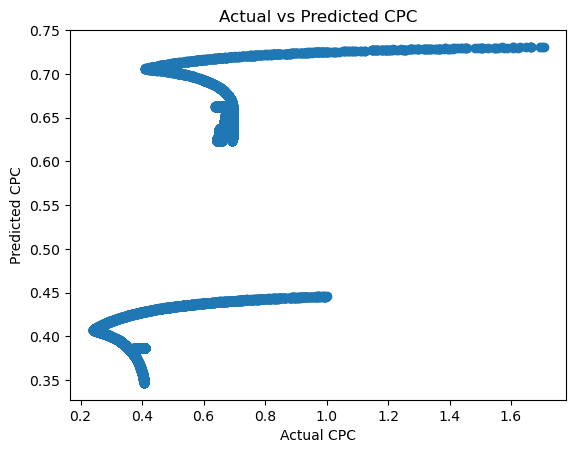

In [114]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted CPC
plt.scatter(y_test_cpc, y_pred_cpc)
plt.xlabel('Actual CPC')
plt.ylabel('Predicted CPC')
plt.title('Actual vs Predicted CPC')
plt.show()


In [116]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_cpc, y_train_cpc)

# Predict CPC
y_pred_rf = rf_model.predict(X_test_cpc)

# Evaluate the Random Forest model
print(f"Random Forest Mean Squared Error: {mean_squared_error(y_test_cpc, y_pred_rf)}")
print(f"Random Forest R-squared: {r2_score(y_test_cpc, y_pred_rf)}")


Random Forest Mean Squared Error: 0.00010594046134357519
Random Forest R-squared: 0.9936950241906397


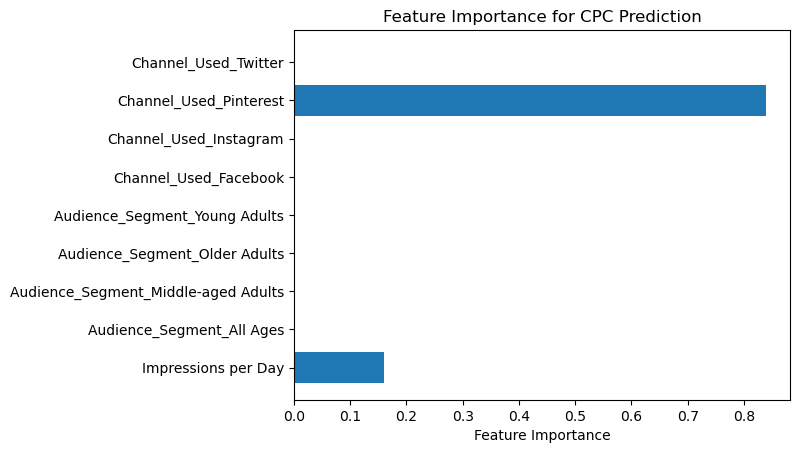

In [117]:
# Get feature importance for Random Forest
importances = rf_model.feature_importances_

# Plot feature importance
plt.barh(X_cpc.columns, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for CPC Prediction')
plt.show()


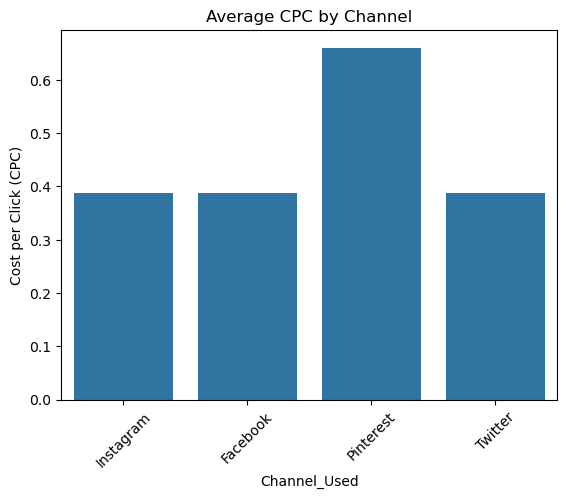

In [120]:
sns.barplot(x='Channel_Used', y='Cost per Click (CPC)', data=df)
plt.xticks(rotation=45)
plt.title('Average CPC by Channel')
plt.show()


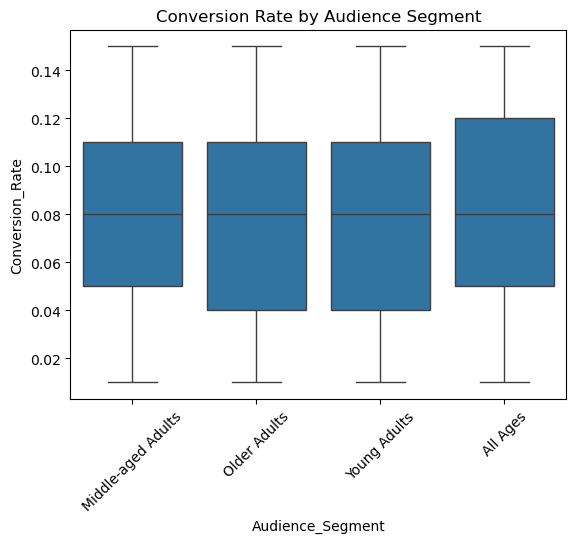

In [122]:
sns.boxplot(x='Audience_Segment', y='Conversion_Rate', data=df)
plt.xticks(rotation=45)
plt.title('Conversion Rate by Audience Segment')
plt.show()
